In [1]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from util import load_dataset, evaluate_model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

Dataset: iris
Decision Tree
Average Accuracy: 0.9467


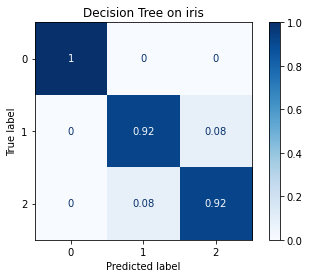

Naive Bayes
Average Accuracy: 0.9467


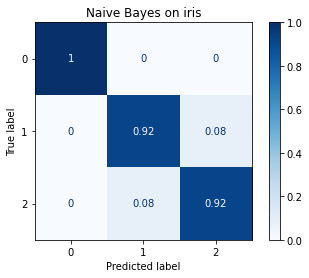

T-test between Decision Tree and Naive Bayes on iris: p = 1.0000
No significant difference in performance.
Dataset: breast_cancer
Decision Tree
Average Accuracy: 0.9280


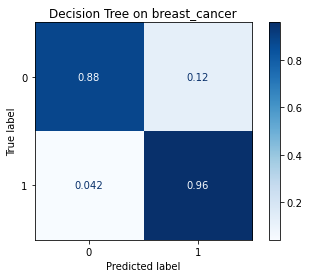

Naive Bayes
Average Accuracy: 0.9297


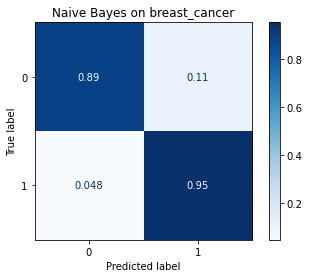

T-test between Decision Tree and Naive Bayes on breast_cancer: p = 0.9119
No significant difference in performance.
Dataset: wine_quality
Decision Tree
Average Accuracy: 0.7396


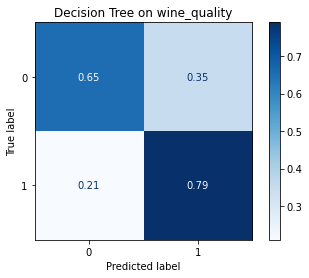

Naive Bayes
Average Accuracy: 0.6811


/common/cse478/shared/envs/hw/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/common/cse478/shared/envs/hw/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/common/cse478/shared/envs/hw/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/common/cse478/shared/envs/hw/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

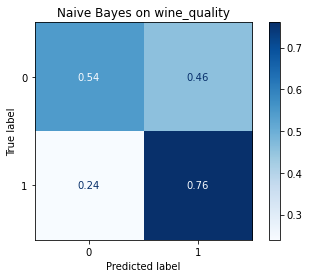

T-test between Decision Tree and Naive Bayes on wine_quality: p = 0.0000
Significant difference in performance.


In [3]:
D_SETS = ["iris", "breast_cancer", "wine_quality"]
n_splits = 5
random_state = 42

models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=random_state), 
    "Naive Bayes": GaussianNB(),
}

for d in D_SETS:
    print(f"Dataset: {d}")
    X, y = load_dataset(d)
    model_scores = {}
    
    for model_name, model in models.items():
        print(f"{model_name}")
        all_scores, conf_matrix = evaluate_model(model, X, y, n_splits=n_splits)
        model_scores[model_name] = all_scores

        print(f"Average Accuracy: {all_scores.mean():.4f}")
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"{model_name} on {d}")
        plt.show()
    
    decisiontree_scores = model_scores["Decision Tree"]
    naivebayes_scores = model_scores["Naive Bayes"]
    t_stat, p_value = ttest_ind(decisiontree_scores, naivebayes_scores)
    print(f"T-test between Decision Tree and Naive Bayes on {d}: p = {p_value:.4f}")
    if p_value < 0.05:
        print("Significant difference in performance.")
    else:
        print("No significant difference in performance.")

    